<a href="https://colab.research.google.com/github/avleenk2312/MATH313/blob/main/StochasticRounding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.1" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.1 on the current Colab Runtime...
2022-09-19 22:37:25 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.1-linux-x86_64.tar.gz [137332197/137332197] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package Plots...


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.8.1
Commit afb6c60d69a (2022-09-06 15:09 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  LD_PRELOAD = /usr/lib/x86_64-linux-gnu/libtcmalloc.so.4
  JULIA_NUM_THREADS = 2


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

# Basics of Rounding

## Types of functions:

[1] **ciel(x)** returns the next largest integer to x (towards + ∞).

[2] **floor(x)** returns the next smallest integer to x (towards - ∞).

[3] **trunc(x)** returns the closest integer towards zero (round to zero).

[4] **round(x,mode)** function with several modes options, see: https://docs.julialang.org/en/v1/base/math/#Base.round-Tuple{Type,%20Any}


In [2]:
ceil(1.3)

2.0

In [11]:
floor(1.3)

1.0

In [ ]:
trunc(1.3)

In [4]:
ceil(-1.3)

2.0

In [5]:
floor(-1.3)

1.0

In [10]:
trunc(-1.3)

-1.0

In [12]:
round(1.3) ## round to nearest by default

1.0

In [14]:
round(-1.3) ## round to neart by deafult

-1.0

In [16]:
round(1.3,RoundToZero)

1.0

In [18]:
round(-1.3,RoundToZero)

1.0

In [19]:
round(1.3,RoundUp)

2.0

In [20]:
round(1.3,RoundDown)

1.0

In [21]:
round(-1.3,RoundUp)

-1.0

In [22]:
round(-1.3,RoundDown)

-2.0

# Stochastic Rounding

Not included in Julia by deafult, a package is available called StochasticRounding.jl

I used a popular randomly round to nearest integer idea as formed in  https://gist.github.com/coleoguy/a50dba496fc55440cb4945fe8e25d703 as mentioned in https://medium.com/@minghz42/what-is-stochastic-rounding-b78670d0c4a to create a version for it in Julia.

In [28]:
using Pkg
Pkg.add("Distributions")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Calculus ──────────────── v0.5.1
   Installed Rmath_jll ─────────────── v0.3.0+0
   Installed HypergeometricFunctions ─ v0.3.11
   Installed StatsFuns ─────────────── v1.0.1
   Installed PDMats ────────────────── v0.11.16
   Installed DualNumbers ───────────── v0.6.8
   Installed Rmath ─────────────────── v0.7.0
   Installed FillArrays ────────────── v0.13.4
   Installed QuadGK ────────────────── v2.5.0
   Installed DensityInterface ──────── v0.4.0
   Installed Distributions ─────────── v0.25.73
    Updating `~/.julia/environments/v1.8/Project.toml`
  [31c24e10] + Distributions v0.25.73
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [49dc2e85] + Calculus v0.5.1
  [b429d917] + DensityInterface v0.4.0
  [31c24e10] + Distributions v0.25.73
  [fa6b7ba4] + DualNumbers v0.6.8
  [1a297f60] + FillArrays v0.13.4
  [34004b35] + HypergeometricFunctions v0.3.11
  [90014a1f] + PDMats

In [29]:
using Distributions
function StochasticRound(x)
    # extract the decimal portion
    r=trunc(x)
    q=abs(x-r)
    # draw a value 0 or 1 with probability
    # based on how close we already are
    Δx = wsample(0:1,[1-q,q],1)
     # make it negative if x is negative
     if(x<0)
         Δx=-Δx
     end
     # return our new value
     r+Δx[1]
end

StochasticRound (generic function with 1 method)

In [30]:
StochasticRound(1.3)

1.0

In [31]:
StochasticRound(1.3)

2.0

## What is the probability?

Let us plot it

Enter x:stdin> 1.5


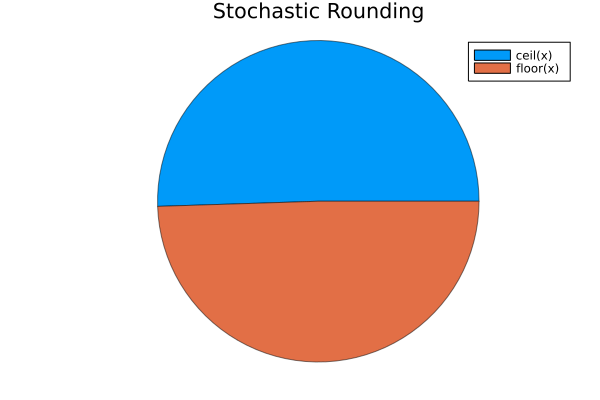

In [33]:
using Plots

global ℘=0
n=10000
print("Enter x:")
x = readline()
x=parse(Float64,x)
for i=1:n
    result=StochasticRound(x)
    if result==ceil(x)
        global ℘=℘+1
    end
end
global ℘=℘/n
Plots.gr() # the default GR backend look for pie charts
x = ["ceil(x)", "floor(x)"]
y = [℘,1-℘]
pie(x, y, title="Stochastic Rounding", l=0.5)